In [57]:
import cv2
import numpy as np
import pickle
from tqdm import tqdm
from pathlib import Path

In [66]:
def unpickle(data_file):
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
    return data

def write_samples_to_file(x, y, output_dir, output_file_extension):
    num_samples = x.shape[0]
    print(f"Writing {num_samples} samples to {output_dir} in .{output_file_extension} format")
    for i in tqdm(range(num_samples)):
        sample_x = x[i]
        sample_y = y[i]
        # Filenaming should be <label>_<name>.<file-extension> for bgpt classification
        output_filepath = f"{output_dir}/{sample_y}_{i}.{output_file_extension}"
        cv2.imwrite(output_filepath, sample_x)

def list_files_in_directory(directory):
    # Create a Path object for the directory
    dir_path = Path(directory)
    output_list = []
    # Use the glob() method to get a list of all files in the directory
    files_list = dir_path.glob('*')
    
    # Iterate over the files and print their names
    for file in files_list:
        if file.is_file():
            output_list.append(str(dir_path / file.name))
    
    return output_list

In [69]:
data_filepath = "/nfs/scratch/jonathan/byte_models/data/imagenet-1k-64x64/raw/test/val_data"
output_dir = "/nfs/scratch/jonathan/byte_models/data/imagenet-1k-64x64/bla"
output_file_extension = "jpeg"
image_height = 64
image_width = 64
image_dim = image_height * image_width
num_channels = 3

Path(output_dir).mkdir(parents=True, exist_ok=True)


In [68]:
print(f"Reading {data_filepath}")
d = unpickle(data_filepath)
x = d['data']
y = d['labels']
y = [i-1 for i in y]
num_samples = x.shape[0]
x = np.dstack((x[:, :image_dim], x[:, image_dim:2*image_dim], x[:, 2*image_dim:]))
x = x.reshape((num_samples, image_height, image_width, num_channels))

x = x[0:num_samples, :, :, :]
y = y[0:num_samples]

# write_samples_to_file(x, y, output_dir, output_file_extension)

Reading /nfs/scratch/jonathan/byte_models/data/imagenet-1k-64x64/raw/val_data


FileNotFoundError: [Errno 2] No such file or directory: '/nfs/scratch/jonathan/byte_models/data/imagenet-1k-64x64/raw/val_data'

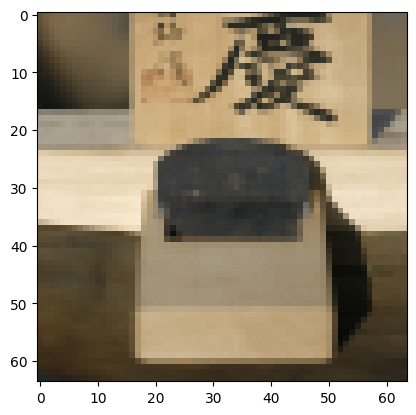

In [71]:
img = x[0]

plt.imshow(img)
plt.show()